In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from datetime import datetime

In [2]:
data_clean = pd.read_csv('transactions_clean.csv')

## Exploratory Data Analysis

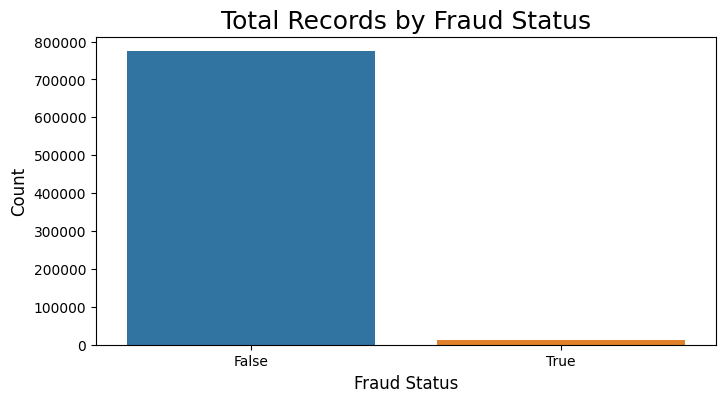

In [3]:
data = data_clean.groupby('isFraud')['isFraud'].value_counts()
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=data.index, y=data.values)
ax.set_xlabel('Fraud Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Total Records by Fraud Status', fontsize=18)
plt.show()

In [7]:
data_clean.groupby('isFraud')['isFraud'].value_counts() / np.sum(data_clean.groupby('isFraud')['isFraud'].value_counts()) * 100

isFraud
False    98.420958
True      1.579042
Name: count, dtype: float64

In [4]:
# fig.savefig('isFraud_counts.png')

In [8]:
numeric = [
 'creditLimit',
 'availableMoney',
 'transactionAmount',
 'currentBalance',]

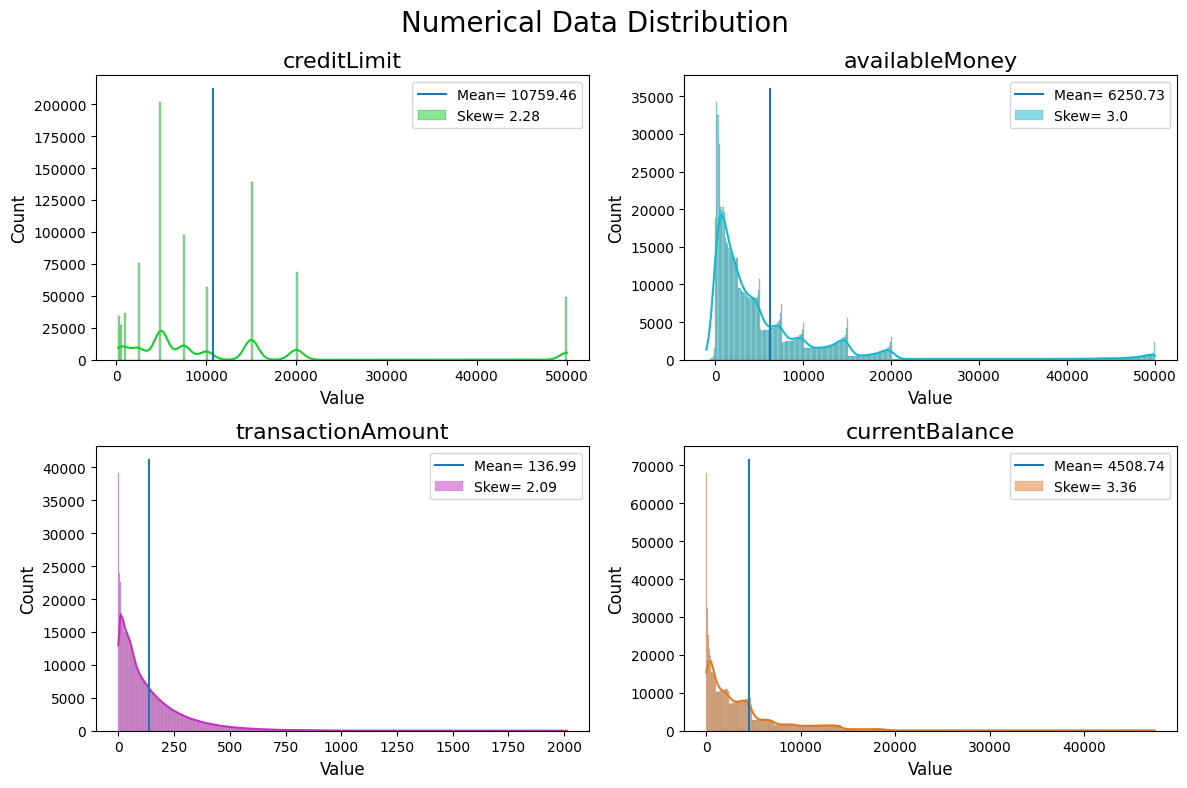

In [9]:
colors = ['#13CF2A', '#13BBCF', '#C72FC2', '#DF7827']
fig, ax = plt.subplots(2, 2, figsize=(12,8))
for col, (var, axi) in zip(colors, zip(numeric, ax.ravel())):
    skew = np.round(stats.skew(data_clean[var]), 2)
    mean = np.round(np.mean(data_clean[var]), 2)
    sns.histplot(data_clean[var], kde=True, ax=axi, label=f"Skew= {skew}", color=col)
    axi.plot([mean, mean], axi.get_ylim(), label=f"Mean= {mean}")
    axi.set_title(var, fontsize=16)
    axi.set_xlabel('Value', fontsize=12)
    axi.set_ylabel('Count', fontsize=12)
    axi.legend()
    
    
fig.suptitle('Numerical Data Distribution', fontsize=20)
fig.tight_layout()
plt.show()

In [7]:
# fig.savefig('numeric_histograms.png')

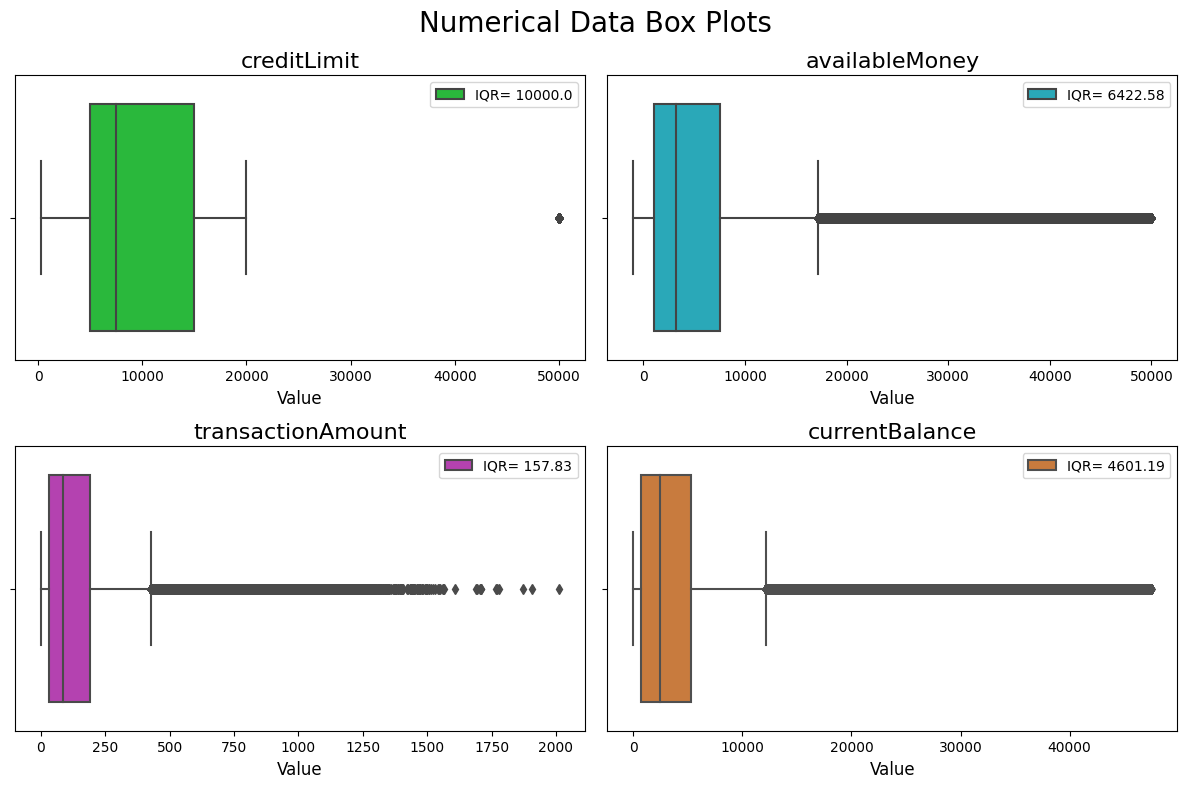

In [8]:
colors = ['#13CF2A', '#13BBCF', '#C72FC2', '#DF7827']
fig, ax = plt.subplots(2, 2, figsize=(12,8))
for col, (var, axi) in zip(colors, zip(numeric, ax.ravel())):
    iqr = np.round(stats.iqr(data_clean[var]), 2)
    sns.boxplot(data_clean[var], ax=axi, color=col, orient='h')
    axi.legend([f"IQR= {iqr}"])
    axi.set_title(var, fontsize=16)
    axi.set_xlabel('Value', fontsize=12)
    axi.set_yticklabels('')
    
fig.suptitle('Numerical Data Box Plots', fontsize=20)
fig.tight_layout()
plt.show()

In [9]:
# fig.savefig('numeric_boxplots.png')

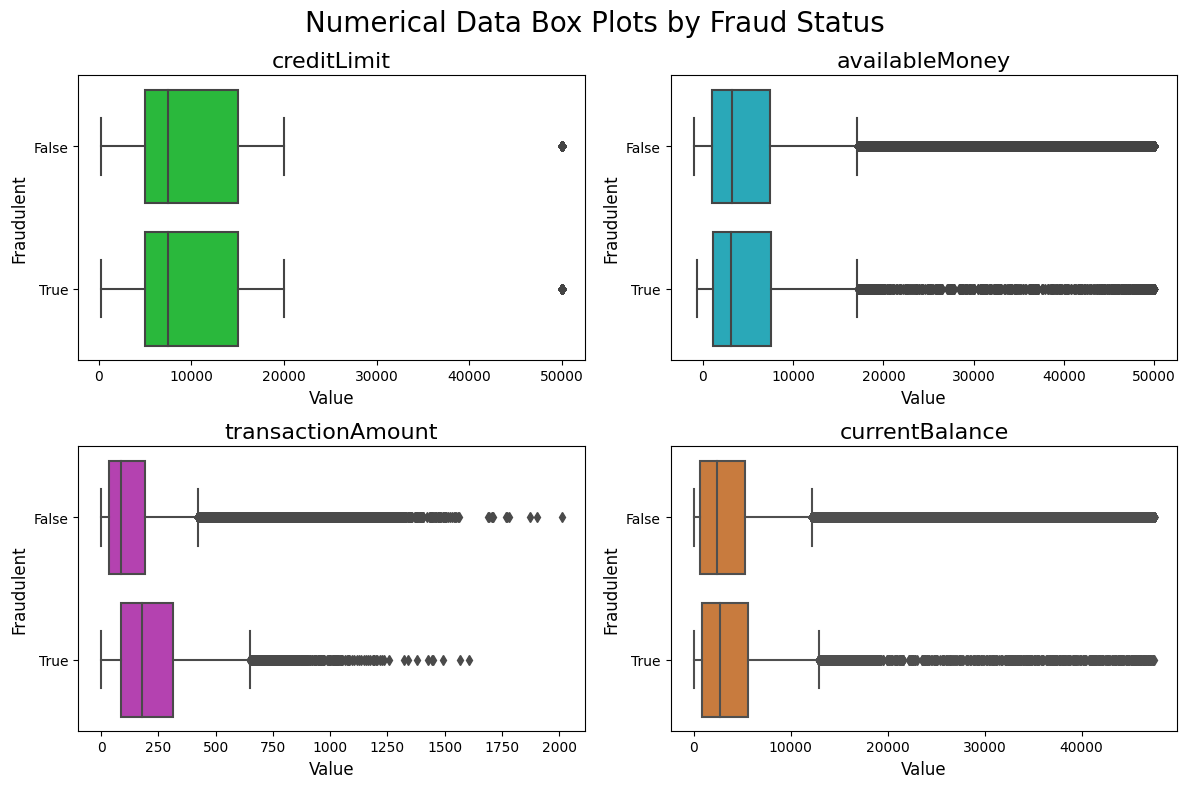

In [10]:
colors = ['#13CF2A', '#13BBCF', '#C72FC2', '#DF7827']
fig, ax = plt.subplots(2, 2, figsize=(12,8))
for col, (var, axi) in zip(colors, zip(numeric, ax.ravel())):
    sns.boxplot(x=data_clean[var], y=data_clean['isFraud'], ax=axi, color=col, orient='h')
    axi.set_title(var, fontsize=16)
    axi.set_xlabel('Value', fontsize=12)
    axi.set_ylabel('Fraudulent', fontsize=12)
    
fig.suptitle('Numerical Data Box Plots by Fraud Status', fontsize=20)
fig.tight_layout()
plt.show()

In [11]:
# fig.savefig('numeric_boxplots_by_fraud.png')

In [13]:
data_clean.groupby('isFraud')['transactionAmount'].median()


isFraud
False     86.76
True     176.98
Name: transactionAmount, dtype: float64

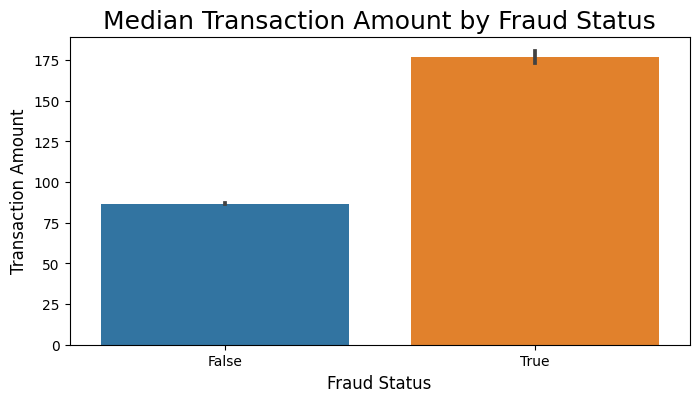

In [12]:
data = data_clean.groupby('isFraud')['transactionAmount'].median()
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='isFraud', y='transactionAmount', data=data_clean, estimator='median')
ax.set_title('Median Transaction Amount by Fraud Status', fontsize=18)
ax.set_xlabel('Fraud Status', fontsize=12)
ax.set_ylabel('Transaction Amount', fontsize=12)
plt.show()

In [14]:
# fig.savefig(trans_amount_by_fraud.png)

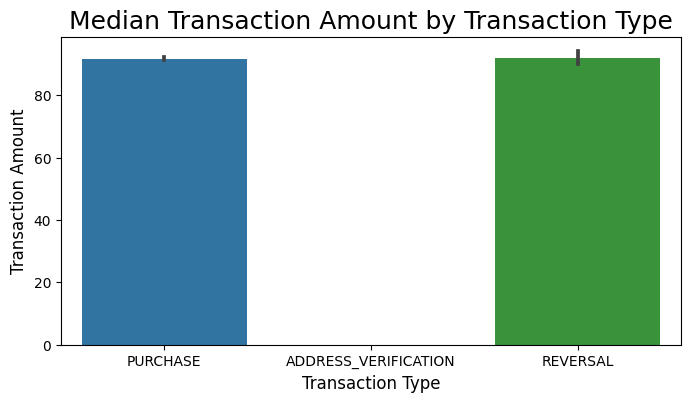

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='transactionType', y='transactionAmount', data=data_clean, estimator='median')
ax.set_title('Median Transaction Amount by Transaction Type', fontsize=18)
ax.set_xlabel('Transaction Type', fontsize=12)
ax.set_ylabel('Transaction Amount', fontsize=12)
plt.show()

In [16]:
# fig.savefig('trans_amount_by_trans_type.png')

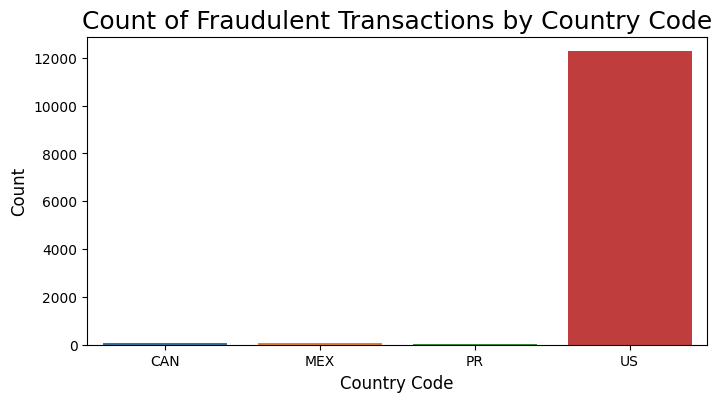

In [40]:
data = data_clean[data_clean.isFraud == True].groupby('acqCountry')['isFraud'].count()
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=data.index, y=data.values)
ax.set_title('Count of Fraudulent Transactions by Country Code', fontsize=18)
ax.set_xlabel('Country Code', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

In [41]:
# fig.savefig('count_isFraud_by_country.png')

In [39]:
data_clean.groupby('acqCountry')['acqCountry'].value_counts() / np.sum(data_clean.groupby('acqCountry')['acqCountry'].value_counts())

acqCountry
CAN    0.003094
MEX    0.004001
PR     0.001971
US     0.990934
Name: count, dtype: float64

In [18]:
data_clean.acqCountry.unique()

array(['US', 'CAN', 'MEX', 'PR'], dtype=object)

In [19]:
data = data_clean[data_clean.acqCountry == 'US'].groupby('isFraud')['isFraud'].value_counts()
data

isFraud
False    766964
True      12270
Name: count, dtype: int64

In [ ]:
plt.pie()

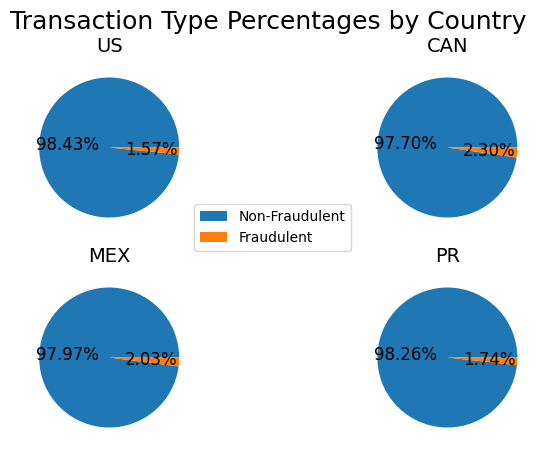

In [88]:
fig, ax = plt.subplots(2,2, figsize=(8,5))
for country, axi in zip(data_clean.acqCountry.unique(), ax.ravel()):
    data = data_clean[data_clean.acqCountry == country].groupby('isFraud')['isFraud'].value_counts()
    axi.pie(x=data.values, autopct='%.2f%%', explode=None, textprops={'fontsize':12})
    axi.set_title(country, fontsize=14)
fig.suptitle('Transaction Type Percentages by Country', fontsize=18)
fig.legend(['Non-Fraudulent', 'Fraudulent'], loc='center')
plt.show()

In [89]:
# fig.savefig('trans_perc_by_country.png')

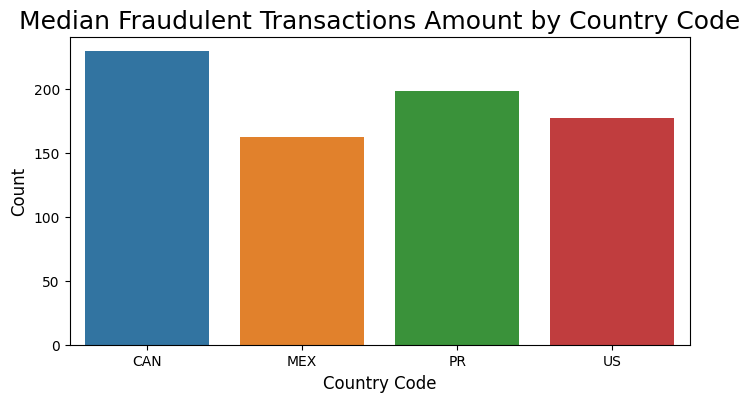

In [47]:
data = data_clean[data_clean.isFraud == True].groupby('acqCountry')['transactionAmount'].median()
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=data.index, y=data.values)
ax.set_title('Median Fraudulent Transactions Amount by Country Code', fontsize=18)
ax.set_xlabel('Country Code', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

In [49]:
# fig.savefig('median_fraud_trans_amount_by_country.png')

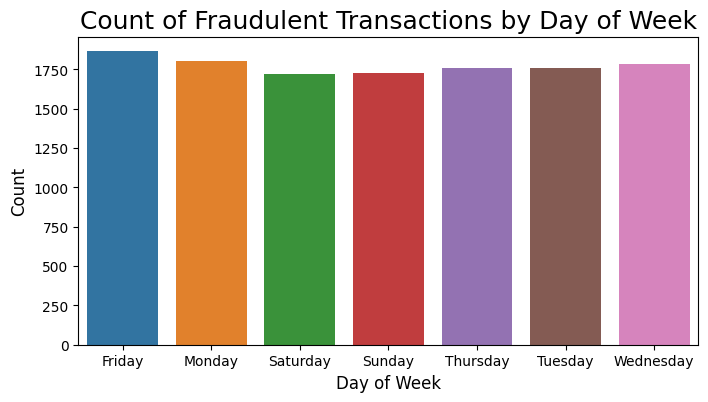

In [21]:
data = data_clean[data_clean.isFraud == True].groupby('trans_day_name')['isFraud'].count()
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=data.index, y=data.values)
ax.set_title('Count of Fraudulent Transactions by Day of Week', fontsize=18)
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

In [22]:
# fig.savefig('count_isFraud_by_day_of_week.png')

### people get paid on friday

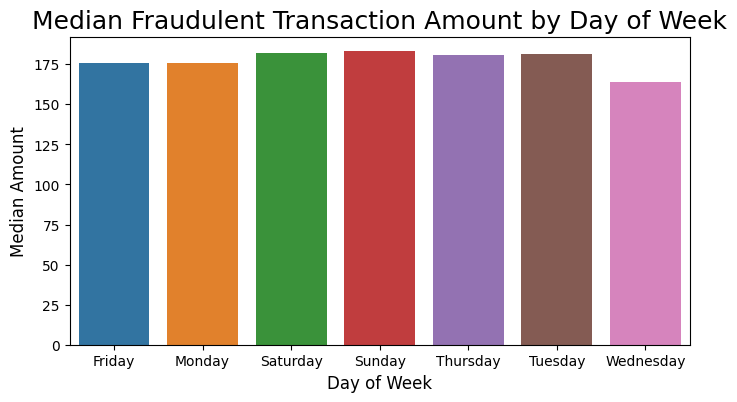

In [23]:
data = data_clean[data_clean.isFraud == True].groupby('trans_day_name')['transactionAmount'].median()
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=data.index, y=data.values)
ax.set_title('Median Fraudulent Transaction Amount by Day of Week', fontsize=18)
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Median Amount', fontsize=12)
plt.show()

In [24]:
# fig.savefig('median_fraud_trans_amount_by_day_of_week.png')

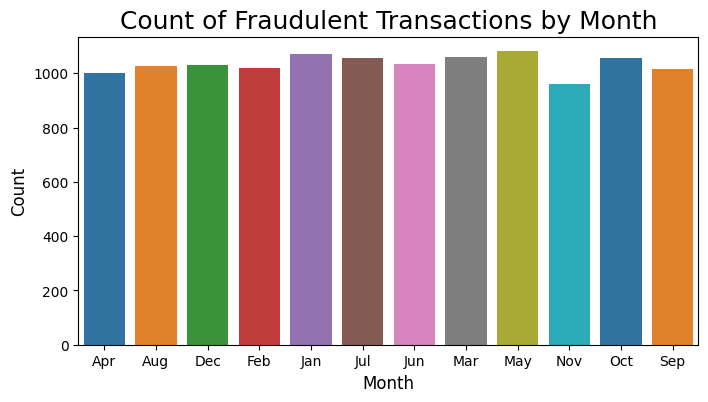

In [25]:
data = data_clean[data_clean.isFraud == True].groupby('trans_month_name')['trans_month_name'].value_counts()
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=data.index, y=data.values, palette=sns.color_palette('tab10', len(data)))
ax.set_title('Count of Fraudulent Transactions by Month', fontsize=18)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

In [26]:
# fig.savefig('count_isFraud_by_month.png')

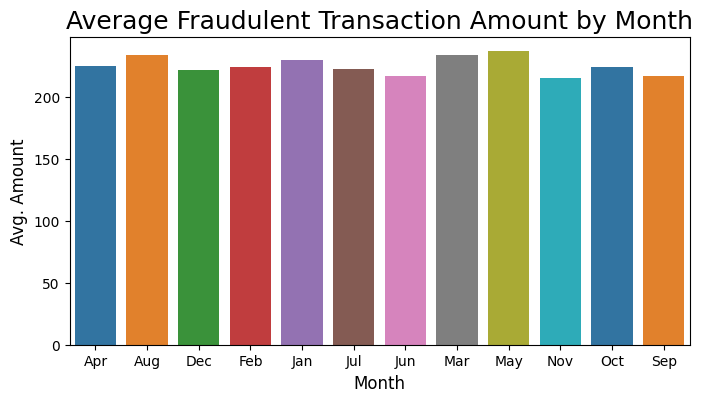

In [27]:
data = data_clean[data_clean.isFraud == True].groupby('trans_month_name')['transactionAmount'].mean()
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=data.index, y=data.values, palette=sns.color_palette('tab10', len(data)))
ax.set_title('Average Fraudulent Transaction Amount by Month', fontsize=18)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Avg. Amount', fontsize=12)
plt.show()

In [28]:
# fig.savefig('avg_isFraud_trans_amount_by_month.png')

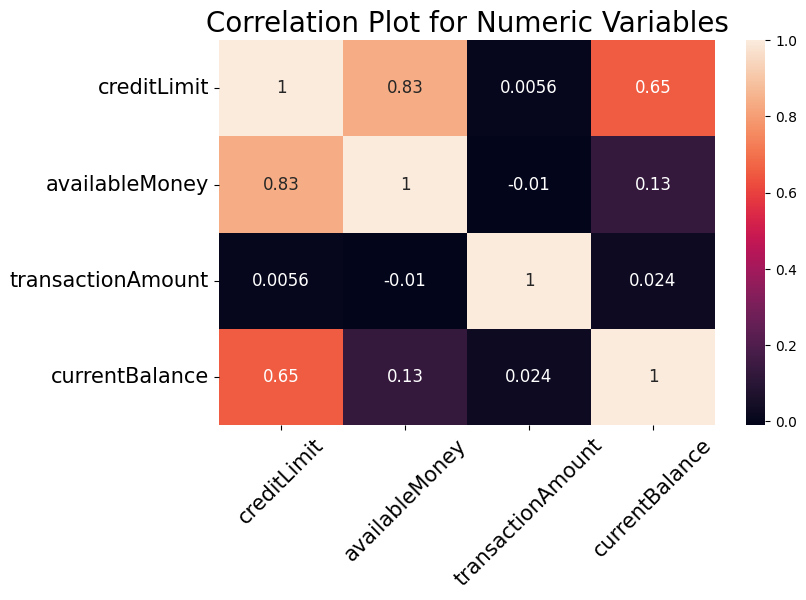

In [31]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(data_clean[numeric].corr(), annot=True, annot_kws={'fontsize':12})
ax.tick_params(labelsize=15)
ax.set_title('Correlation Plot for Numeric Variables', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [32]:
# fig.savefig('correlation_plot.png')

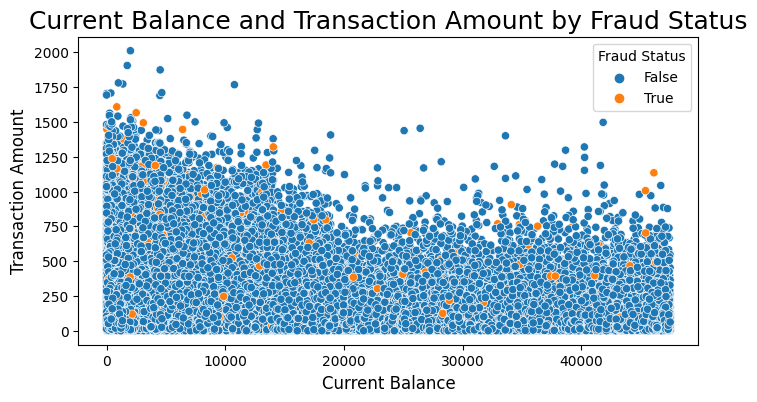

In [33]:
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(data=data_clean, x='currentBalance', y='transactionAmount', hue='isFraud')
ax.set_title('Current Balance and Transaction Amount by Fraud Status', fontsize=18)
ax.set_xlabel('Current Balance', fontsize=12)
ax.set_ylabel('Transaction Amount', fontsize=12)
ax.legend().set_title('Fraud Status')
plt.show()

In [ ]:
# fig.savefig('bal_trans_by_isFraud.png')

/home/georgetz/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


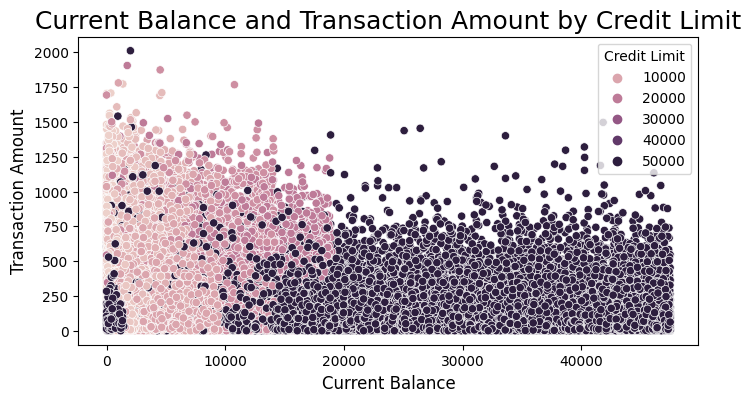

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(data=data_clean, x='currentBalance', y='transactionAmount', hue='creditLimit')
ax.set_title('Current Balance and Transaction Amount by Credit Limit', fontsize=18)
ax.set_xlabel('Current Balance', fontsize=12)
ax.set_ylabel('Transaction Amount', fontsize=12)
ax.legend().set_title('Credit Limit')
plt.show()

In [ ]:
# fig.savefig('bal_trans_by_credit_limit.png')

/tmp/ipykernel_193656/1831232574.py:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig('bal_trans_by_credit_limit.png')


In [ ]:
data_clean.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,trans_day_name,trans_month,trans_day_addr_change_diff,trans_day_open_date_diff
0,737265056,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,...,1803,PURCHASE,0.0,False,False,False,Saturday,8,518,518
1,737265056,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,...,767,PURCHASE,0.0,True,False,False,Tuesday,10,577,577
2,737265056,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,767,PURCHASE,0.0,False,False,False,Tuesday,11,605,605
3,737265056,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,767,PURCHASE,0.0,False,False,False,Saturday,12,637,637
4,830329091,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,...,3143,PURCHASE,0.0,True,False,False,Thursday,3,231,231


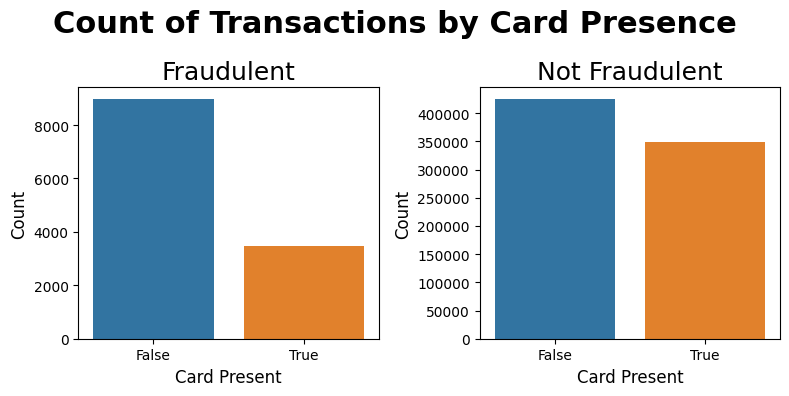

In [63]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
data = data_clean[data_clean.isFraud == True].groupby('cardPresent')['cardPresent'].value_counts()
sns.barplot(x=data.index, y=data.values, ax=ax[0])
#ax[0].set_title('Fraudulent', fontsize=18)
data = data_clean[data_clean.isFraud == False].groupby('cardPresent')['cardPresent'].value_counts()
sns.barplot(x=data.index, y=data.values, ax=ax[1])
for titlei, axi in zip(['Fraudulent', 'Not Fraudulent'], [ax[0], ax[1]]):
    axi.set_title(titlei, fontsize=18)
    axi.set_xlabel('Card Present', fontsize=12)
    axi.set_ylabel('Count', fontsize=12)
    
fig.suptitle('Count of Transactions by Card Presence', fontsize=22, fontweight='semibold')
fig.tight_layout()
plt.show()

In [52]:
# fig.savefig('count_cardPresent_by_isFraud.png')

In [69]:
data_clean[data_clean.isFraud == True].groupby('cardPresent')['cardPresent'].value_counts()

cardPresent
False    8962
True     3455
Name: count, dtype: int64

In [67]:
data_clean[data_clean.isFraud == True].groupby('cardPresent')['cardPresent'].value_counts() / np.sum(data_clean[data_clean.isFraud == True].groupby('cardPresent')['cardPresent'].value_counts())

cardPresent
False    0.721752
True     0.278248
Name: count, dtype: float64

In [70]:
data_clean[data_clean.isFraud == False].groupby('cardPresent')['cardPresent'].value_counts()

cardPresent
False    424533
True     349413
Name: count, dtype: int64

In [68]:
data_clean[data_clean.isFraud == False].groupby('cardPresent')['cardPresent'].value_counts() / np.sum(data_clean[data_clean.isFraud == False].groupby('cardPresent')['cardPresent'].value_counts())

cardPresent
False    0.548531
True     0.451469
Name: count, dtype: float64

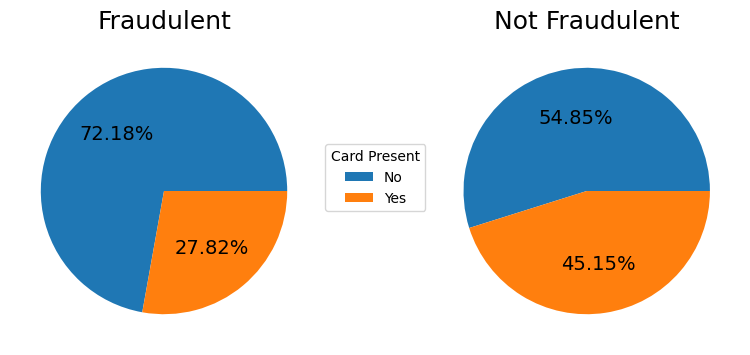

In [85]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
data = data_clean[data_clean.isFraud == True].groupby('cardPresent')['cardPresent'].value_counts()
ax[0].pie(data.values, autopct="%1.2f%%", textprops={'fontsize':14})
data = data_clean[data_clean.isFraud == False].groupby('cardPresent')['cardPresent'].value_counts()
ax[1].pie(data.values, autopct="%1.2f%%", textprops={'fontsize':14})
for titlei, axi in zip(['Fraudulent', 'Not Fraudulent'], [ax[0], ax[1]]):
    axi.set_title(titlei, fontsize=18)
#fig.tight_layout()
legend = fig.legend(['No', 'Yes'], loc='center')
legend.set_title('Card Present')

plt.show()

In [86]:
# fig.savefig('perc_cardPresent_by_isFraud.png')

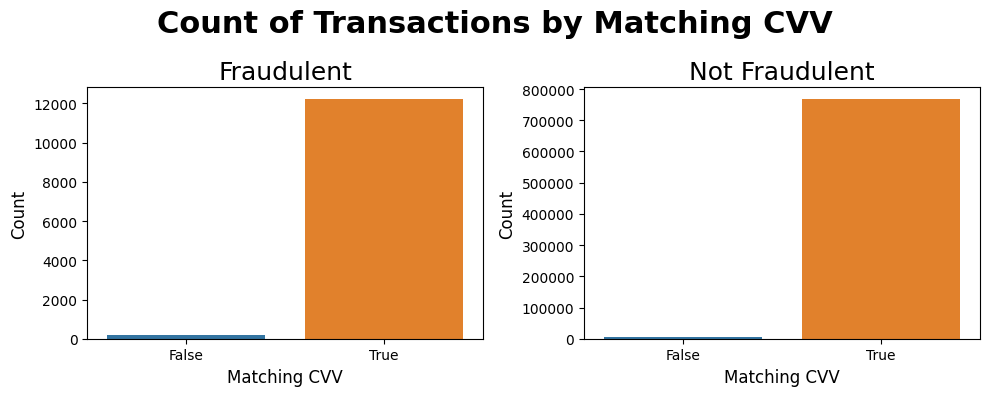

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
data = data_clean[data_clean.isFraud == True].groupby(['matchingCVV'])['matchingCVV'].value_counts()
sns.barplot(x=data.index, y=data.values, ax=ax[0])
data = data_clean[data_clean.isFraud == False].groupby(['matchingCVV'])['matchingCVV'].value_counts()
sns.barplot(x=data.index, y=data.values, ax=ax[1])
for titlei, axi in zip(['Fraudulent', 'Not Fraudulent'], [ax[0], ax[1]]):
    axi.set_title(titlei, fontsize=18)
    axi.set_xlabel('Matching CVV', fontsize=12)
    axi.set_ylabel('Count', fontsize=12)
    
fig.suptitle('Count of Transactions by Matching CVV', fontsize=22, fontweight='semibold')
fig.tight_layout()
plt.show()

In [ ]:
# fig.savefig('count_trans_by_matchingCVV.png')

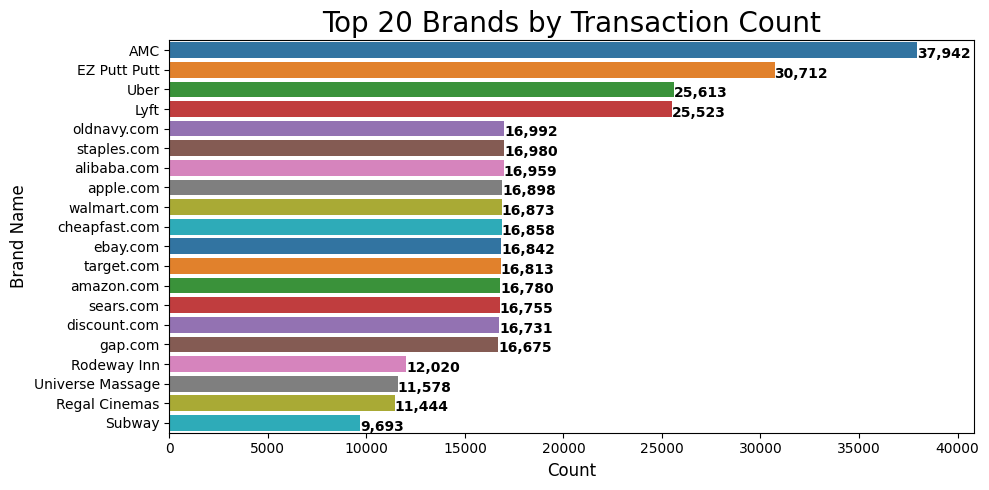

In [96]:
data = data_clean.groupby('brandName')['brandName'].value_counts().sort_values(ascending=False)[:20]
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=data.values, y=data.index, orient='h', palette=sns.color_palette('tab10', len(data)))
ax.set_title('Top 20 Brands by Transaction Count', fontsize=20)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Brand Name', fontsize=12)
for i, v in enumerate(data.values):
    ax.text(v + 1, i+ax.patches[i].get_height()/2, format(v, ',d'), color='black', fontweight='bold')
    
ax.set_xlim(0, ax.get_xlim()[1]+1000)
fig.tight_layout()
plt.show()

In [ ]:
ax.patches[15].get_height()/2

0.4

In [97]:
# fig.savefig('top_20_merchants_by_count.png')

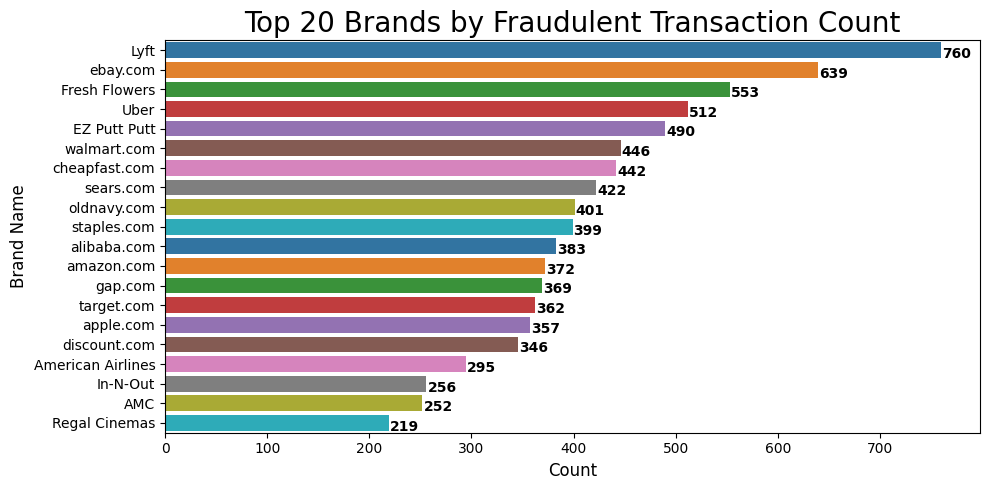

In [94]:
data = data_clean[data_clean.isFraud == True].groupby('brandName')['brandName'].value_counts().sort_values(ascending=False)[:20]
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=data.values, y=data.index, orient='h', palette=sns.color_palette('tab10', len(data)))
ax.set_title('Top 20 Brands by Fraudulent Transaction Count', fontsize=20)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Brand Name', fontsize=12)
for i, v in enumerate(data.values):
    ax.text(v + 1, i+ax.patches[i].get_height()/2, format(v, ',d'), color='black', fontweight='bold')
    
# ax.set_xlim(0, ax.get_xlim()[1]+10)
fig.tight_layout()
plt.show()

In [95]:
# fig.savefig('top_20_merchants_by_fraudulent_count.png')

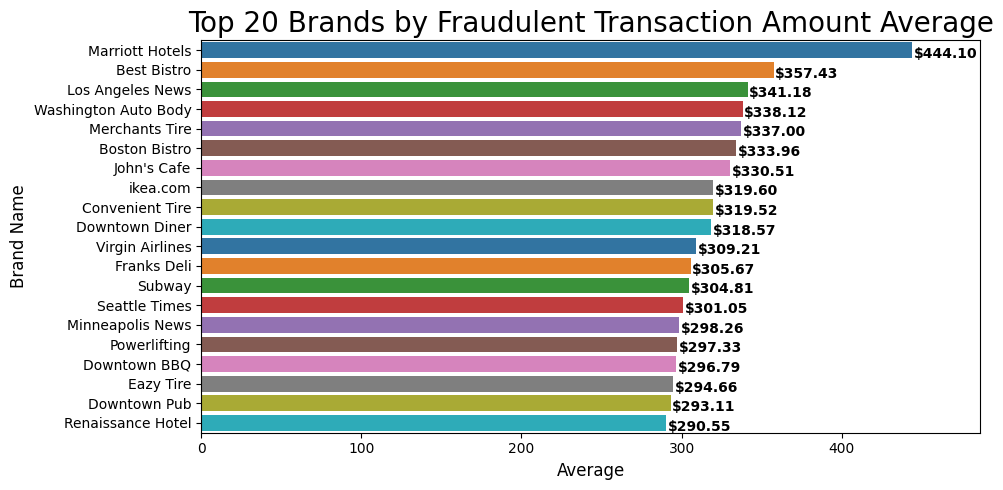

In [92]:
data = data_clean[data_clean.isFraud == True].groupby('brandName')['transactionAmount'].mean().sort_values(ascending=False)[:20]
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=data.values, y=data.index, orient='h', palette=sns.color_palette('tab10', len(data)))
ax.set_title('Top 20 Brands by Fraudulent Transaction Amount Average', fontsize=20)
ax.set_xlabel('Average', fontsize=12)
ax.set_ylabel('Brand Name', fontsize=12)
for i, v in enumerate(data.values):
    # ax.text(v + 1, i+ax.patches[i].get_height()/2, f"${format(round(v,2), ',')}", color='black', fontweight='bold')
    ax.text(v + 1, i+ax.patches[i].get_height()/2, "${:.2f}".format(round(v, 2)), color='black', fontweight='bold')
    
ax.set_xlim(0, ax.get_xlim()[1]+20)
fig.tight_layout()
plt.show()

In [93]:
# fig.savefig('top_20_merchants_by_avg_trans_amount.png')

In [ ]:
data_clean.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,trans_day_name,trans_month,trans_day_addr_change_diff,trans_day_open_date_diff,matchingCVV,brandName
0,737265056,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,...,0.0,False,False,False,Saturday,8,518,518,True,Uber
1,737265056,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,...,0.0,True,False,False,Tuesday,10,577,577,True,AMC
2,737265056,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,0.0,False,False,False,Tuesday,11,605,605,True,Play Store
3,737265056,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,0.0,False,False,False,Saturday,12,637,637,True,Play Store
4,830329091,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,...,0.0,True,False,False,Thursday,3,231,231,True,Tim Hortons


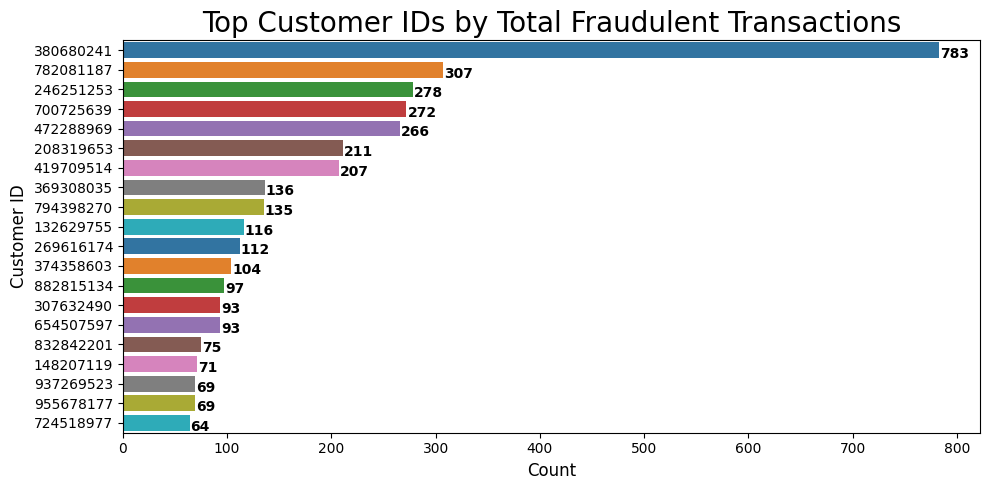

In [ ]:
data = data_clean[data_clean.isFraud == True].groupby('customerId')['customerId'].value_counts().sort_values(ascending=False)[:20]
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=data.values, y=data.index.astype(str), orient='h', palette=sns.color_palette('tab10', len(data)))
ax.set_title('Top Customer IDs by Total Fraudulent Transactions', fontsize=20)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Customer ID', fontsize=12)
for i, v in enumerate(data.values):
    # ax.text(v + 1, i+ax.patches[i].get_height()/2, f"${format(round(v,2), ',')}", color='black', fontweight='bold')
    ax.text(v + 1, i+ax.patches[i].get_height()/2, v, color='black', fontweight='bold')
    
fig.tight_layout()
plt.show()

In [ ]:
# fig.savefig('top_20_customer_ids_by_isFraud_count.png')

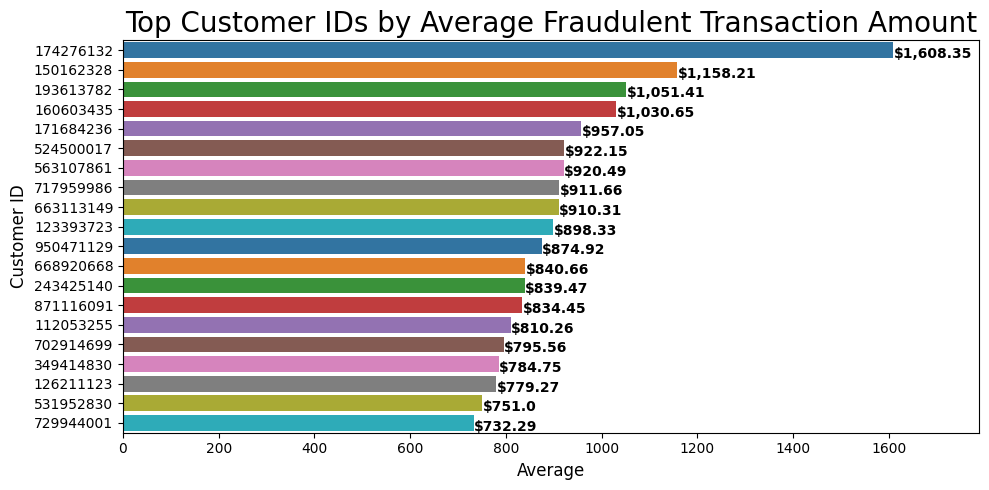

In [ ]:
data = data_clean[data_clean.isFraud == True].groupby('customerId')['transactionAmount'].mean().sort_values(ascending=False)[:20]
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=data.values, y=data.index.astype(str), orient='h', palette=sns.color_palette('tab10', len(data)))
ax.set_title('Top Customer IDs by Average Fraudulent Transaction Amount', fontsize=20)
ax.set_xlabel('Average', fontsize=12)
ax.set_ylabel('Customer ID', fontsize=12)
for i, v in enumerate(data.values):
    ax.text(v + 1, i+ax.patches[i].get_height()/2, f"${format(round(v,2), ',')}", color='black', fontweight='bold')
ax.set_xlim(0, ax.get_xlim()[1]+100)    
fig.tight_layout()
plt.show()

In [ ]:
# fig.savefig('top_20_customer_ids_by_isFraud_avg.png')